<a href="https://colab.research.google.com/github/LibBonda/14-Case-study-retail-data-analysis/blob/main/Case_study_retail_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Case Study: Retail Sales Insights
import pandas as pd
retail_df = pd.read_csv('retail_sales.csv')
retail_df.head()
#retail_df.shape

,Date,Product,Units_Sold,Price,Revenue,Region
0,2025-01-01,Shirt,15,500,7500,Urban
1,2025-01-02,Shoes,10,1200,12000,Urban
2,2025-01-03,Jeans,8,1500,12000,Rural
3,2025-02-01,Shirt,12,500,6000,Urban
4,2025-02-02,Shoes,5,1200,6000,Rural


In [ ]:
#object - --- non numeric, alpha numeric, strings.
#'12-02-2025'
print(retail_df.dtypes)

Date          object
Product       object
Units_Sold     int64
Price          int64
Revenue        int64
Region        object
dtype: object


In [ ]:
#Project Objective

#Analyze a retail sales dataset to identify sales trends, seasonal patterns, and customer purchase behaviors
#to help the business make data-driven decisions.

Dataset Overview

Columns:
Date – Transaction date
Product – Product name/category
Units_Sold – Number of units sold
Price – Unit price
Revenue – Total revenue
Region – Sales region or store location


Data Cleaning

Handled missing values.
Converted Date column to datetime format.
Created Month and Year columns for time-based analysis.


Date column is converted to datetime format in Pandas using:

df['Date'] = pd.to_datetime(df['Date'])

Why convert Date to datetime format?
Because:

In CSV files, dates are typically stored as plain text/strings.
Pandas cannot recognize them as actual dates until converted.
Once converted, you can easily:
Extract Year, Month, Day, or Month-Year.
Perform grouping by month or year.
Plot data over time (time series analysis).
Sort chronologically.

Time-based functions like extracting months, sorting by date, and grouping will now work.

In [ ]:
#converting date column to date format
retail_df['Date'] = pd.to_datetime(retail_df['Date'])


In [ ]:
display(retail_df)
retail_df.dtypes

,Date,Product,Units_Sold,Price,Revenue,Region
0,2025-01-01,Shirt,15,500,7500,Urban
1,2025-01-02,Shoes,10,1200,12000,Urban
2,2025-01-03,Jeans,8,1500,12000,Rural
3,2025-02-01,Shirt,12,500,6000,Urban
4,2025-02-02,Shoes,5,1200,6000,Rural
5,2025-03-01,Shirt,18,500,9000,Urban
6,2025-03-02,Shoes,15,1200,18000,Urban
7,2025-03-03,Jeans,12,1500,18000,Rural
8,2025-04-01,Jacket,20,2000,40000,Urban
9,2025-05-01,Jacket,5,2000,10000,Rural


,0
Date,datetime64[ns]
Product,object
Units_Sold,int64
Price,int64
Revenue,int64
Region,object


In [ ]:
retail_df.dtypes

,0
Date,datetime64[ns]
Product,object
Units_Sold,int64
Price,int64
Revenue,int64
Region,object


Convert Date & Extract Components in Pandas

Why This is Important:

When analyzing data over time (sales, events, orders), we often need:

Yearly, monthly, weekly reports.
Trends based on weekdays or seasons.
Pandas lets us easily extract these parts from a date once it’s properly formatted.

Extract Date Components:



In [ ]:
# Extract components
#retail_df['year'] = retail_df['Date'].dt.year
retail_df['Year'] = retail_df['Date'].dt.year
retail_df['Month'] = retail_df['Date'].dt.month
retail_df['Month_Name'] = retail_df['Date'].dt.month_name()
retail_df['Day'] = retail_df['Date'].dt.day
retail_df['Day_Name'] = retail_df['Date'].dt.day_name()
#retail_df['Week_Number'] = retail_df['Date'].dt.isocalendar().week

display(retail_df)


,Date,Product,Units_Sold,Price,Revenue,Region,Year,Month,Month_Name,Day,Day_Name,Week_Number
0,2025-01-01,Shirt,15,500,7500,Urban,2025,1,January,1,Wednesday,1
1,2025-01-02,Shoes,10,1200,12000,Urban,2025,1,January,2,Thursday,1
2,2025-01-03,Jeans,8,1500,12000,Rural,2025,1,January,3,Friday,1
3,2025-02-01,Shirt,12,500,6000,Urban,2025,2,February,1,Saturday,5
4,2025-02-02,Shoes,5,1200,6000,Rural,2025,2,February,2,Sunday,5
5,2025-03-01,Shirt,18,500,9000,Urban,2025,3,March,1,Saturday,9
6,2025-03-02,Shoes,15,1200,18000,Urban,2025,3,March,2,Sunday,9
7,2025-03-03,Jeans,12,1500,18000,Rural,2025,3,March,3,Monday,10
8,2025-04-01,Jacket,20,2000,40000,Urban,2025,4,April,1,Tuesday,14
9,2025-05-01,Jacket,5,2000,10000,Rural,2025,5,May,1,Thursday,18


Month
1    31500
2    12000
3    45000
4    40000
5    10000
Name: Revenue, dtype: int64


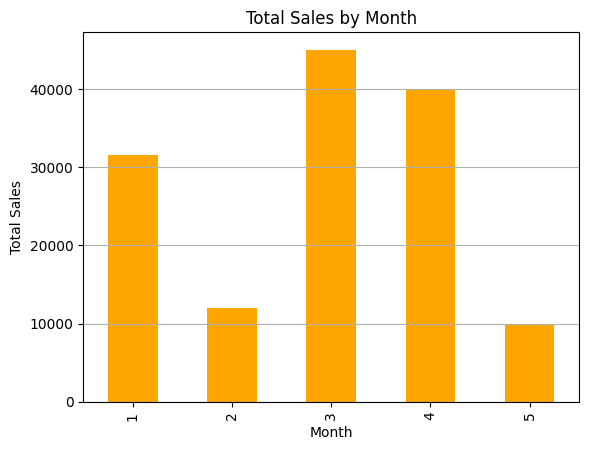

In [ ]:

import matplotlib.pyplot as plt

# Group by Month
#monthly_sales = retail_df.gorupby('Month')['Revenue'].sum() #for each month group sum all the revenue
monthly_sales = retail_df.groupby('Month')['Revenue'].sum()
print(monthly_sales)

# Plot Monthly Sales
monthly_sales.plot(kind='bar',color='orange')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()


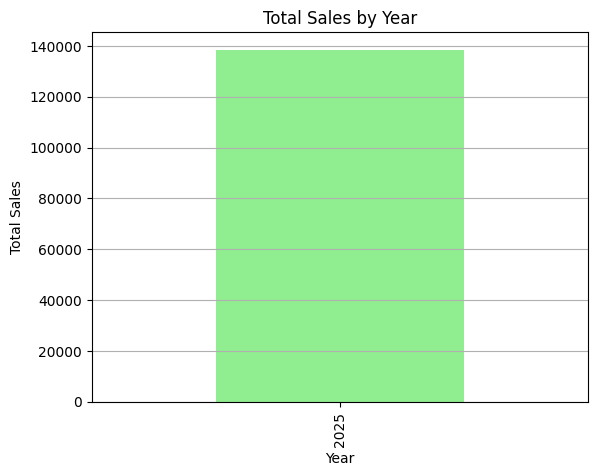

In [ ]:
#Group Sales by Year – Bar Plot


yearly_sales = retail_df.groupby('Year')['Revenue'].sum()

# Plot Yearly Sales
yearly_sales.plot(kind='bar', color='lightgreen')
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(axis='y')
plt.show()


    Day_Name  Revenue
0  Wednesday     7500
1     Friday    12000
2   Saturday    15000
3     Monday    18000
4   Thursday    22000
5     Sunday    24000
6    Tuesday    40000


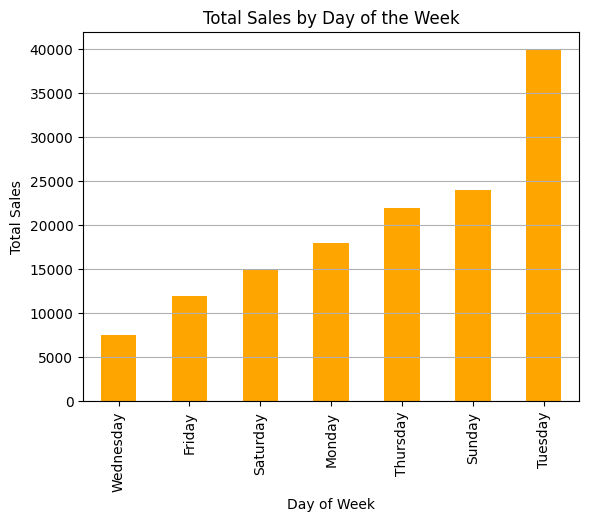

In [ ]:
#Busiest Days of the Week – Bar Plot
# Extract Day of Week
#retail_df['Day_of_Week'] = retail_df['Date'].dt.day_name()
import matplotlib.pyplot as plt
# Group by Day of Week
weekday_sales = retail_df.groupby('Day_Name')['Revenue'].sum().sort_values(ascending=True)
print(weekday_sales.reset_index())

# Plot
weekday_sales.plot(kind='bar', color='orange')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales')
plt.grid(axis='y')
plt.show()



,Date,Product,Units_Sold,Price,Revenue,Region,Year,Month,Month_Name,Day,Day_Name,Week_Number
0,2025-01-01,Shirt,15,500,7500,Urban,2025,1,January,1,Wednesday,1
1,2025-01-02,Shoes,10,1200,12000,Urban,2025,1,January,2,Thursday,1
2,2025-01-03,Jeans,8,1500,12000,Rural,2025,1,January,3,Friday,1
3,2025-02-01,Shirt,12,500,6000,Urban,2025,2,February,1,Saturday,5
4,2025-02-02,Shoes,5,1200,6000,Rural,2025,2,February,2,Sunday,5
5,2025-03-01,Shirt,18,500,9000,Urban,2025,3,March,1,Saturday,9
6,2025-03-02,Shoes,15,1200,18000,Urban,2025,3,March,2,Sunday,9
7,2025-03-03,Jeans,12,1500,18000,Rural,2025,3,March,3,Monday,10
8,2025-04-01,Jacket,20,2000,40000,Urban,2025,4,April,1,Tuesday,14
9,2025-05-01,Jacket,5,2000,10000,Rural,2025,5,May,1,Thursday,18


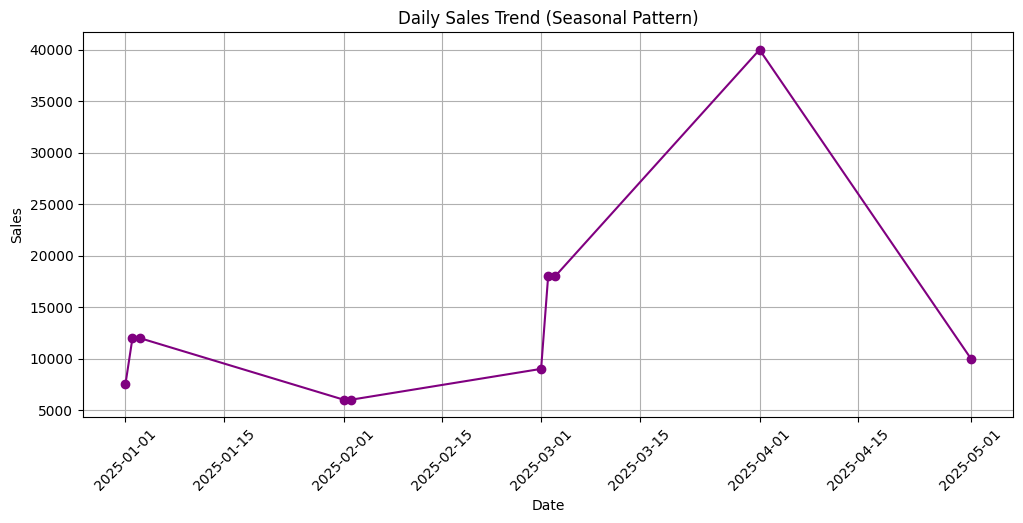

In [ ]:

display(retail_df)

# Plot Daily Sales (Seasonal Pattern)
plt.figure(figsize=(12,5))
plt.plot(retail_df['Date'], retail_df['Revenue'], marker='o', linestyle='-', color='purple')
plt.title('Daily Sales Trend (Seasonal Pattern)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


In [ ]:
#groupby for retail_sales data
#Total Revenue by Product
# Total Revenue per Product
product_revenue = retail_df.groupby('Product')['Revenue'].sum()

print(product_revenue)
#Business Insight: Find best-selling products by revenue.

Product
Jacket    50000
Jeans     30000
Shirt     22500
Shoes     36000
Name: Revenue, dtype: int64


In [ ]:
#Count of Orders per Product
# Total Orders per Product
order_counts = retail_df.groupby('Product')['Units_Sold'].count()

print(order_counts)
#Insight: How often each product is sold.

Product
Jacket    2
Jeans     2
Shirt     3
Shoes     3
Name: Units_Sold, dtype: int64


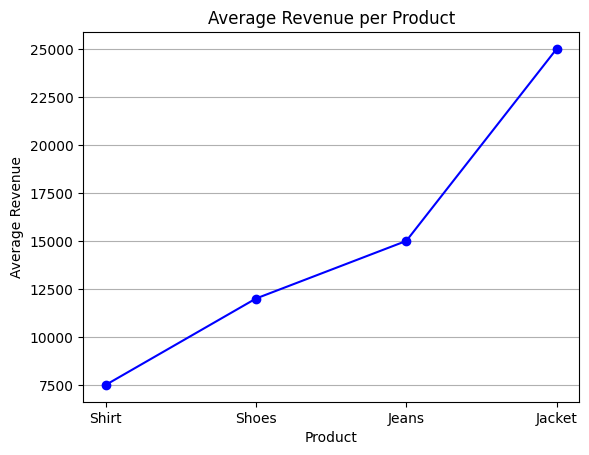

In [ ]:
#Average Revenue per Product
# Average Revenue per Product
import matplotlib.pyplot as plt

avg_revenue = retail_df.groupby('Product')['Revenue'].mean().reset_index()
avg_revenue = retail_df.groupby('Product')['Revenue'].mean().sort_values(ascending = True).reset_index()
plt.plot(avg_revenue['Product'], avg_revenue['Revenue'], marker='o', linestyle='-', color='blue')
plt.title('Average Revenue per Product')
plt.xlabel('Product')
plt.ylabel('Average Revenue')
plt.grid(axis='y')
plt.show()


#Insight: High-ticket vs low-ticket products.

  Product  Revenue
0   Shirt     9000
1   Jeans    18000
2   Shoes    18000
3  Jacket    40000


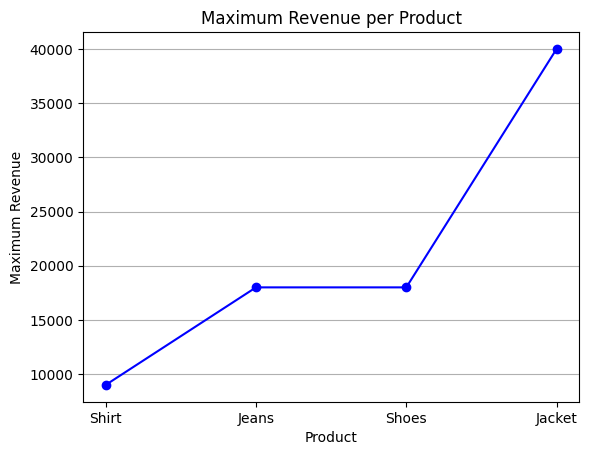

In [ ]:
retail_df.head()
#Maximum Revenue in a Single Sale per Product
# Max Revenue per Product
max_revenue = retail_df.groupby('Product')['Revenue'].max().sort_values(ascending=True).reset_index()

print(max_revenue)
max_revenue = retail_df.groupby('Product')['Revenue'].max().sort_values(ascending=True).reset_index()
plt.plot(max_revenue['Product'], max_revenue['Revenue'], marker='o', linestyle='-', color='blue')
plt.title('Maximum Revenue per Product')
plt.xlabel('Product')
plt.ylabel('Maximum Revenue')
plt.grid(axis='y')
plt.show()
# Insight: Biggest single sale value per product.



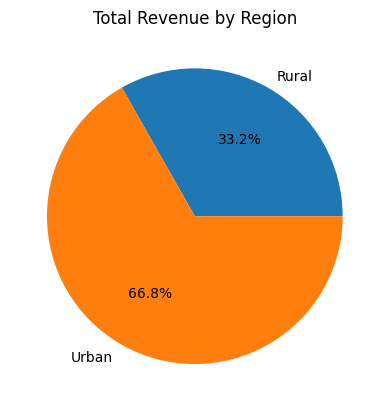

Region
Rural    46000
Urban    92500
Name: Revenue, dtype: int64


In [ ]:
#Revenue by Region
# Total Revenue per Region
retail_df.head()
region_revenue = retail_df.groupby('Region')['Revenue'].sum()
plt.pie(region_revenue, labels=region_revenue.index, autopct='%1.1f%%')
plt.title('Total Revenue by Region')
plt.show()

print(region_revenue)

#Insight: Identify high-performing regions.

In [ ]:
#Total Revenue by Product and Region (Multiple Columns GroupBy)
# Revenue per Product per Region
display(retail_df)
product_region_revenue = retail_df.groupby(['Product', 'Region'])['Revenue'].sum().reset_index()

print(product_region_revenue)


,Date,Product,Units_Sold,Price,Revenue,Region
0,2025-01-01,Shirt,15,500,7500,Urban
1,2025-01-02,Shoes,10,1200,12000,Urban
2,2025-01-03,Jeans,8,1500,12000,Rural
3,2025-02-01,Shirt,12,500,6000,Urban
4,2025-02-02,Shoes,5,1200,6000,Rural
5,2025-03-01,Shirt,18,500,9000,Urban
6,2025-03-02,Shoes,15,1200,18000,Urban
7,2025-03-03,Jeans,12,1500,18000,Rural
8,2025-04-01,Jacket,20,2000,40000,Urban
9,2025-05-01,Jacket,5,2000,10000,Rural


  Product Region  Revenue
0  Jacket  Rural    10000
1  Jacket  Urban    40000
2   Jeans  Rural    30000
3   Shirt  Urban    22500
4   Shoes  Rural     6000
5   Shoes  Urban    30000


,Date,Product,Units_Sold,Price,Revenue,Region,Month_Year
0,2025-01-01,Shirt,15,500,7500,Urban,2025-01
1,2025-01-02,Shoes,10,1200,12000,Urban,2025-01
2,2025-01-03,Jeans,8,1500,12000,Rural,2025-01
3,2025-02-01,Shirt,12,500,6000,Urban,2025-02
4,2025-02-02,Shoes,5,1200,6000,Rural,2025-02


  Month_Year  Revenue
0    2025-05    10000
1    2025-02    12000
2    2025-01    31500
3    2025-04    40000
4    2025-03    45000


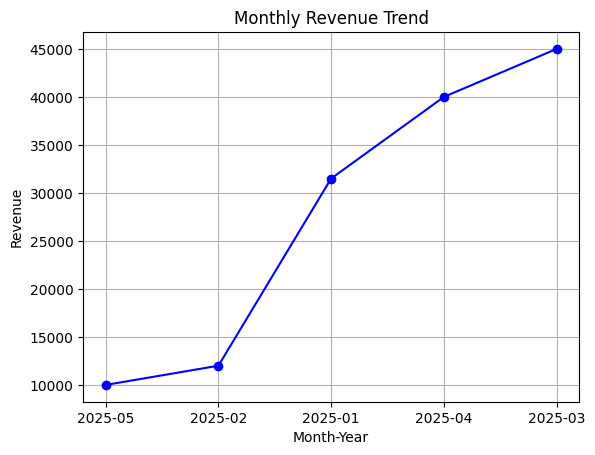

  Month_Year  Revenue
0    2025-05    10000
1    2025-02    12000
2    2025-01    31500
3    2025-04    40000
4    2025-03    45000


In [ ]:
#Monthly Revenue Trend using Date Column
# Ensure Date is in datetime format
retail_df['Date'] = pd.to_datetime(retail_df['Date'])

# Group by Month-Year
retail_df['Month_Year'] = retail_df['Date'].dt.to_period('M')
display(retail_df.head())
# Total Monthly Revenue
monthly_revenue = retail_df.groupby('Month_Year')['Revenue'].sum().sort_values(ascending = True).reset_index()
print(monthly_revenue)
plt.plot(monthly_revenue['Month_Year'].astype(str), monthly_revenue['Revenue'], marker='o', linestyle='-', color='blue')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month-Year')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

print(monthly_revenue)

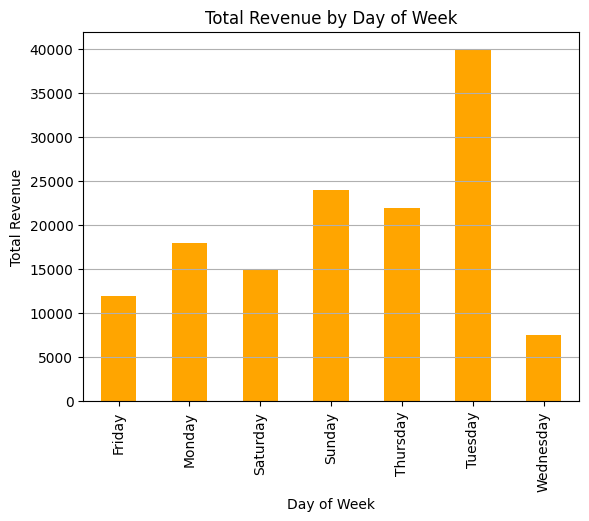

Axes(0.125,0.11;0.775x0.77)


In [ ]:
#Group by Day of Week (Busiest Days)
# Extract Day of Week
retail_df['Day_of_Week'] = retail_df['Date'].dt.day_name()

# Total Revenue per Day of Week
weekday_revenue = retail_df.groupby('Day_of_Week')['Revenue'].sum().sort_index().plot(kind='bar', color='orange')
plt.title('Total Revenue by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Revenue')
plt.grid(axis='y')
plt.show()

print(weekday_revenue)
#Insight: Year-wise total revenue.

In [ ]:
#Using reset_index() for Clean Output


# Convert groupby result to simple table
monthly_revenue_df = monthly_revenue.reset_index()

print(monthly_revenue_df)


   index Month_Year  Revenue
0      0    2025-05    10000
1      1    2025-02    12000
2      2    2025-01    31500
3      3    2025-04    40000
4      4    2025-03    45000


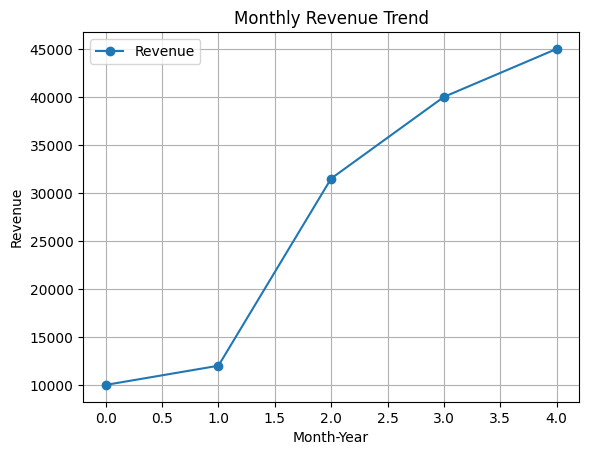

In [ ]:
#visualization tip
monthly_revenue.plot(kind='line', marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month-Year')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()
